# Import
---

In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv1D, Dense, Embedding, GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

# Data
---

In [2]:
# this URL doesnt work directly with pd.read_csv
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-09-20 16:03:09--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.81.48, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2020-09-20 16:03:09 (12.1 MB/s) - ‘spam.csv’ saved [503663/503663]



In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.columns=['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [7]:
# split data
X_train, X_test, y_train, y_test = train_test_split(df['data'], Y, test_size=0.33)

In [8]:
# convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

In [9]:
# get word mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print(f'{V} unique tokens in')

7343 unique tokens in


In [12]:
# pad sequences so we get N x T matrix
X_train = pad_sequences(sequence_train)
print('shape of data train tensor: ', X_train.shape)

# get sequence length
T = X_train.shape[1]

shape of data train tensor:  (3733, 189)


In [13]:
X_test = pad_sequences(sequence_test, maxlen=T)
print('shape of data test tensor: ', X_test.shape)

shape of data test tensor:  (1839, 189)


# Model
---


Epoch 1/10
117/117 [==============================] - 1s 9ms/step - loss: 0.3969 - accuracy: 0.8567 - val_loss: 0.2559 - val_accuracy: 0.8717
Epoch 2/10
117/117 [==============================] - 1s 6ms/step - loss: 0.1127 - accuracy: 0.9571 - val_loss: 0.0773 - val_accuracy: 0.9810
Epoch 3/10
117/117 [==============================] - 1s 7ms/step - loss: 0.0254 - accuracy: 0.9941 - val_loss: 0.0601 - val_accuracy: 0.9875
Epoch 4/10
117/117 [==============================] - 1s 6ms/step - loss: 0.0080 - accuracy: 0.9984 - val_loss: 0.0481 - val_accuracy: 0.9869
Epoch 5/10
117/117 [==============================] - 1s 6ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0641 - val_accuracy: 0.9880
Epoch 6/10
117/117 [==============================] - 1s 6ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0626 - val_accuracy: 0.9880
Epoch 7/10
117/117 [==============================] - 1s 6ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0554 - val_accuracy: 0.9875
Epoch 

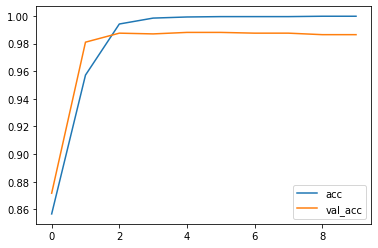

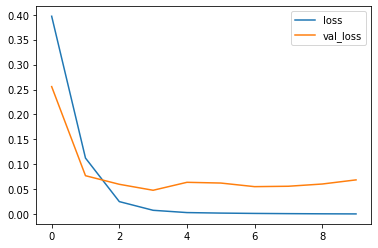

In [21]:
D = 20

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

# Plot
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()